In [16]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim

In [17]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

#datasets
trainset=torchvision.datasets.FashionMNIST('./data',download=True,train=True,transform=transform)

testset=torchvision.datasets.FashionMNIST('./data',download=True,train=False,transform=transform)


In [18]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True,num_workers=2)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,shuffle=False,num_workers=2)

In [19]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [20]:
def matplotlib_imshow(img,one_channel=False):
    if one_channel:
        img=img.mean(dim=0)
    img=img/2+0.5
    npimg=img.numpy()
    if one_channel:
        plt.imshow(npimg,cmap='Greys')
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))       

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(1,6,5)
        self.pool1=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*4*4,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x=self.conv1(x)
        x=F.relu(x)
        x=self.pool1(x)
        x=self.conv2(x)
        x=F.relu(x)
        x=self.pool1(x)
        x=x.view(-1,16*4*4)
        x=self.fc1(x)
        x=F.relu(x)
        x=self.fc2(x)
        x=F.relu(x)
        x=self.fc3(x)
        return x
net=Net()

In [22]:
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [23]:
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [24]:
from torch.utils.tensorboard import SummaryWriter
writer=SummaryWriter('runs/fashion_mnist_experiment_1')

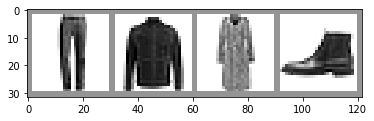

In [25]:
#get random training images
dataiter=iter(trainloader)
images,labels=dataiter.next()  #batch=4

#create grid of images
img_grid=torchvision.utils.make_grid(images)

#show images
matplotlib_imshow(img_grid,one_channel=True)

#write to tensorboard
writer.add_image('four_fashion_mnist_images',img_grid)

In [26]:
writer.add_graph(net,images)
writer.close()